## 写真から輪郭抽出 
* findContours関数

In [84]:
import cv2
import matplotlib.pyplot as plt

#画像を読み込んでリサイズする
img=cv2.imread("bolt.jpg")
img=cv2.resize(img, (300,300))

# #OpenCVではBGR表示、pltではRGB表示で異なる
# plt.imshow(img)
# plt.show()

In [85]:
"""
[色空間を2値化]
#まずはグレースケール化
#ノイズの除去で平滑化をする、ボカシを入れるためにガウシアンフィルタを実行
#その画像に対して閾値より大きい場合は白、小さい場合は黒に2値化
"""
gray_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img=cv2.GaussianBlur(gray_img, (7,7), 0)
im2=cv2.threshold(gray_img, 180, 240, cv2.THRESH_BINARY_INV)[1]
# plt.imshow(im2)
# plt.show()


In [86]:
"""
[輪郭の抽出]
#cv2.findContours()関数を使う
#引数：入力画像、抽出モード、抽出メソッド
#戻り値：輪郭リスト、階層構造
"""
contours=cv2.findContours(im2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]

In [87]:
#抽出した輪郭を描図
for pt in contours:
    x, y, w, h=cv2.boundingRect(pt)
    #大きすぎたり、小さすぎたりする領域を除去
    if w<40 or w>250:
        continue
    print("座標：",x,y)
    print("サイズ:", w,h)
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)

# #左側に2値化した画像を表示
# plt.subplot(1, 2, 1)
# plt.imshow(im2, cmap="gray")

# #右側に抽出結果を表示
# plt.subplot(1,2,2)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.savefig("find_contours.jpg", dpi=200)
# plt.show()

座標： 93 4
サイズ: 111 294


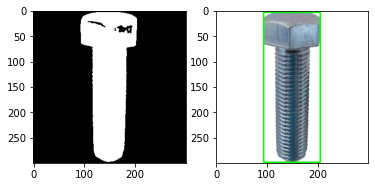

In [75]:
#左側に2値化した画像を表示
plt.subplot(1, 2, 1)
plt.imshow(im2, cmap="gray")

#右側に抽出結果を表示
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig("find_contours.jpg", dpi=200)
plt.show()

## 輪郭を抽出するメソッド

In [94]:
"""
メソッド名：find_contours()
引数：インデックスindex、画像filename、閾値th、範囲width、
"""

def find_contours(index, filename, th, width_min, width_max):
    import cv2
    import matplotlib.pyplot as plt
    
    #画像を読み込み
    img=cv2.imread(filename)
    img=cv2.resize(img, (300,300))
    
     #画像の2値化
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray=cv2.GaussianBlur(gray, (7,7), 0)
    im2=cv2.threshold(gray, th, 240, cv2.THRESH_BINARY_INV)[1]
    
    #輪郭抽出
    contours=cv2.findContours(im2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
    
    #抽出した領域を描く
    for i,pt in enumerate(contours):
        x, y, w, h=cv2.boundingRect(pt)
        if w<width_min or w>width_max: continue
        print(f"{i}     座標：{x},{y} サイズ：{w}x{h}")
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)
    
    #モノクロ画像（左）と輪郭抽出画像（右）
    plt.subplot(1,2,1)
    plt.imshow(im2, cmap="gray")
    
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    save_filename="./find_contours_result/find_contours"+str(index)+".jpg"
    plt.savefig(save_filename)
    plt.show()

4     座標：93,4 サイズ：111x294


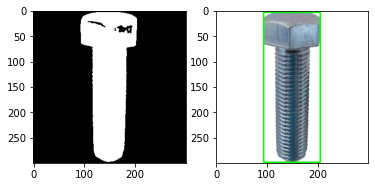

In [95]:
find_contours(index=1, filename="bolt.jpg", th=180, width_min=40, width_max=200)